Let's start by importing the relevant libraries required for our Data Analysis and understand their usage:
1. pandas: It is one of the most important python library used for data analysis task. We will use this library to read the dataframe and perform calculations on dataframe.
2. matplotlib: This library is mainly used for plotting graphs.
3. seaborn: This library works over matplotlib and gives a better visualisation of the graphs and plots.
4. nltk: This is an important library in the language processing world. We will use this to play around with the reviews and texts.
5. wordcloud: A library used to create wordcloud for a large chunk of words.
6. re: This library is used to work with the regular expressions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('crocs_reviews_cleaned.csv')
df

,author_name,review_title,review_text,product_rating,product_colour,men_size,women_size,review_helpfullness,review_date
0,Outdoor Enthusiast!,Not the good made in USA ones of years ago,"I have worn Crocs for years, but the well-ma...",1,Grass Green,9.0,7.0,367,2018
1,MoMo Wondertoes,Two completely different sized shoes marked th...,We have been buying crocs for a long time an...,1,Black,7.0,5.0,327,2017
2,PJM,Love Crocs but....,I was hoping these would fit like the Classi...,1,Navy,9.0,7.0,157,2018
3,Shemit,Not buying Crocs.,I would never recommend the now-a-day Crocs ...,1,Black,7.0,5.0,154,2017
4,Amazon Customer,Didn't last a month,I bought these to replace an earlier pair wh...,1,Navy,11.0,9.0,71,2018
...,...,...,...,...,...,...,...,...,...
8691,Tim H.,Just buy crocs,"Crocs are great, simple and comfortable always",5,Black,6.0,4.0,0,2019
8692,Avainyuna,review,Your browser does not support HTML5 video. ...,5,White,8.0,6.0,0,2020
8693,Patricia L. Meyer,Very nice,"Bought for granddaughter, she loves them",5,New Mint,9.0,7.0,0,2019
8694,K. lee,Great buy.,Fits and feels very comfortable. Perfect for...,5,Navy,11.0,9.0,0,2019


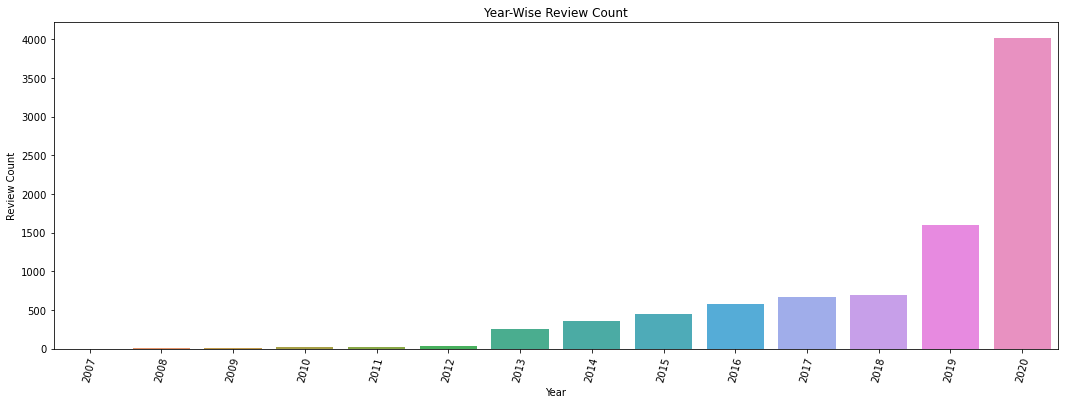

In [3]:
review_counts_date_wise = df['review_date'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=review_counts_date_wise.index, y=review_counts_date_wise)
plt.xticks(rotation=75)
plt.title('Year-Wise Review Count')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.show()

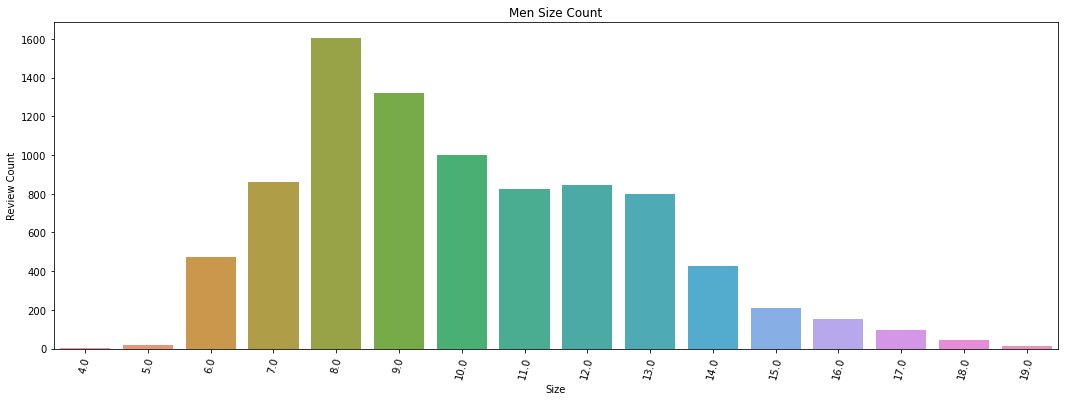

In [4]:
men_size_counts = df['men_size'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=men_size_counts.index, y=men_size_counts)
plt.xticks(rotation=75)
plt.title('Men Size Count')
plt.xlabel('Size')
plt.ylabel('Review Count')
plt.show()

The above graph shows the Crocs Size and the review counts, in men category, showing the crocs that got the highest reviews. From this graph we can also interpret that Size 8 could be the highest selling size in this category.

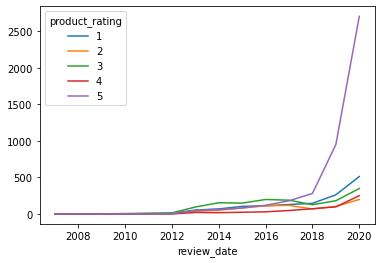

<Figure size 864x576 with 0 Axes>

In [20]:
pd.crosstab(df['review_date'], df['product_rating']).plot(kind="line")
plt.figure(figsize=(12,8))
plt.show()

The above graph tells us that from the year 2018 till year 2020, there has been an exponential rise in the number of ratings given and the 5 start rating reached the peak by the end of 2020. 

### Question 1: What are the top 5 most important words used in the Product Review ?

Let's try to answer this question by using the <b>text mining techniques</b> and <b>wordcloud</b>

First, we will join all the reviews into a single paragraph

In [24]:
crocs_reviews_string = " ".join(df['review_text'])

Since we don't want any unwanted symbols, we will first remove, if any.

Then we will split the complete string into individual words, so that we can remove the stopwords from them. At this time we add the product name to the list of the `stop_words` to get a better result.

After removing the stopwords, we will join the words again and form a paragraph.

In [25]:
# Removing unwanted symbols incase if exists
crocs_reviews_string = re.sub("[^A-Za-z" "]+"," ",crocs_reviews_string).lower()
crocs_reviews_string = re.sub("[0-9" "]+"," ",crocs_reviews_string)


# words that contained in crocs reviews
crocs_reviews_words = crocs_reviews_string.split(" ")


stop_words = stopwords.words('english')
newStopWords = ['croc', 'shoe', 'crocs', 'shoes']
stop_words.extend(newStopWords)

crocs_reviews_words = [w for w in crocs_reviews_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_reviews_string = " ".join(crocs_reviews_words)

In [26]:
crocs_reviews_string

' worn years well made ones came usa colorado many years ago made china ones harder plastic extremely wide feet slip around fall also anywhere near comfortable due harder plastic even fit properly already started return process disappointed since many years american made ones finally starting wear need replacing buying long time time received marked right size one significantly smaller narrow something realized leaving vacation year old constantly complained one small large wear could find store buy flip flops return time got back worn sure happened definitely two different sizes hoping would fit like classic clog already still feel small third pair ordered lately seem find fit hoping ended donating others value village since worn couple times none seemed roomy ones almost worn love frustrated trying find right fit would never recommend day clogs anyonecrocs unisex classic clog black us men us women worn pair clogs years decided time replace clogs nothing like clogs years ago sad say q

Finally, we make a wordcloud by using the paragraph to see the top 5 most important and frequently used words in the product review.

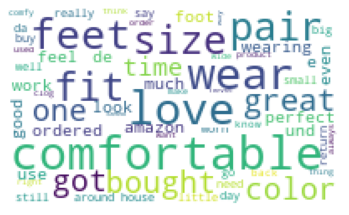

dict_keys(['comfortable', 'wear', 'love', 'feet', 'fit', 'pair', 'size', 'great', 'one', 'got', 'bought', 'color', 'time', 'wearing', 'good', 'perfect', 'ordered', 'foot', 'feel', 'e', 'work', 'use', 'amazon', 'even', 'much', 'und', 'de', 'look', 'around house', 'really', 'say', 'well', 'still', 'worn', 'small', 'da', 'little', 'buy', 'go', 'need', 'big', 'day', 'return', 'back', 'know', 'comfy', 'clog', 'product', 'thing', 'wide', 'think', 'always', 'right', 'make', 'order', 'used', 'way', 'never', 'want', 'seem', 'purchased', 'style', 'happy', 'nice', 'sizing', 'lot', 'expected', 'year', 'going', 'first pair', 'find', 'put', 'comfort', 'un', 'ordered size', 'came', 'strap', 'toe', 'made', 'wore', 'better', 'problem', 'sole', 'husband', 'thought', 'sure', 'said', 'tried', 'first', 'house', 'fit perfectly', 'walk', 'come', 'sock', 'true size', 'price', 'die schuhe', 'slip', 'store', 'new'])


In [29]:
crocs_wordcloud = WordCloud(
                      background_color='white',
                    width=200,
                    height=120,
                      max_words = 100
                     ).generate(crocs_reviews_string)

plt.imshow(crocs_wordcloud)
plt.axis("off")
plt.show()
print(crocs_wordcloud.words_.keys())

### Answer 1: So by the above wordcloud and the dictionary, we can see that the top 5 words used in the reviews are:
1. comfortable 
2. wear 
3. love 
4. feet 
5. fit

### Question 2: Which color had all time maximum sale ? 

We can create a graph between the sale count and the colors to get the color which has the highest number of sales.

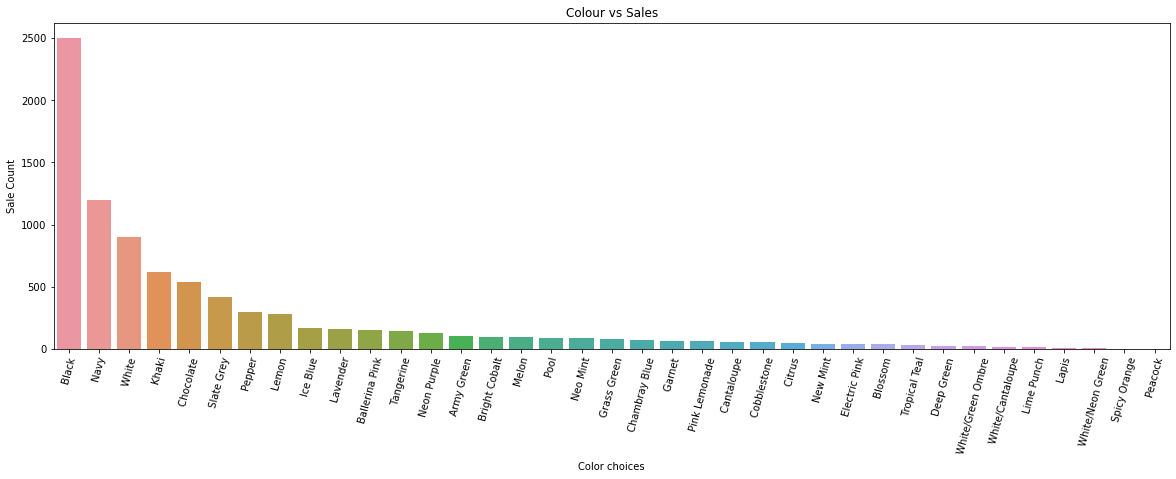

In [10]:
colour_counts = df['product_colour'].value_counts()

plt.figure(figsize=(20,6))
sns.barplot(x=colour_counts.index, y=colour_counts)
plt.xticks(rotation=75)
plt.title('Colour vs Sales')
plt.ylabel('Sale Count')
plt.xlabel('Color choices')
plt.show()

### Answer 2: From above graph, we can see that 'Black color' has the maximum sale

In [11]:
df.head()

,author_name,review_title,review_text,product_rating,product_colour,men_size,women_size,review_helpfullness,review_date
0,Outdoor Enthusiast!,Not the good made in USA ones of years ago,"I have worn Crocs for years, but the well-ma...",1,Grass Green,9.0,7.0,367,2018
1,MoMo Wondertoes,Two completely different sized shoes marked th...,We have been buying crocs for a long time an...,1,Black,7.0,5.0,327,2017
2,PJM,Love Crocs but....,I was hoping these would fit like the Classi...,1,Navy,9.0,7.0,157,2018
3,Shemit,Not buying Crocs.,I would never recommend the now-a-day Crocs ...,1,Black,7.0,5.0,154,2017
4,Amazon Customer,Didn't last a month,I bought these to replace an earlier pair wh...,1,Navy,11.0,9.0,71,2018


### Question 3: What is the yearly rating trend and what do you understand by this trend ?

In [13]:
yearly_rating_trend = df.groupby("review_date")['product_rating'].mean()
print(yearly_rating_trend)

review_date
2007    1.000000
2008    3.200000
2009    2.750000
2010    2.941176
2011    2.210526
2012    2.538462
2013    2.887160
2014    2.855932
2015    2.773756
2016    2.881533
2017    3.048048
2018    3.393113
2019    3.857322
2020    4.104530
Name: product_rating, dtype: float64


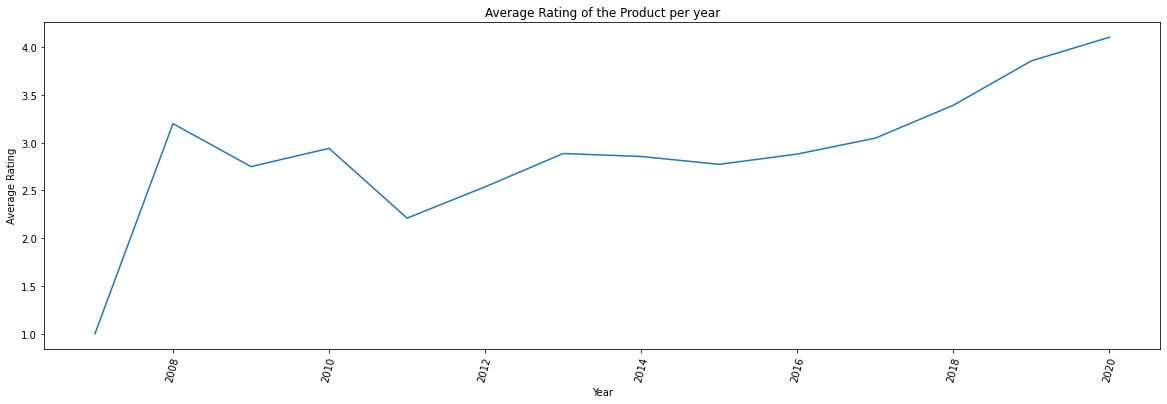

In [20]:
plt.figure(figsize=(20,6))
plt.plot(yearly_rating_trend.index, yearly_rating_trend)
plt.xticks(rotation=75)
plt.title('Average Rating of the Product per year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

### Answer 3: By looking at the trend, we can conclude multiple things as follows:

1. The upward trend of the graph shows an increase in the Customer satisfaction rate in the last 5 years.
2. It also tells that the product has sustained the market since last 13 years. 
3. There are two possibities either the product quality has increased or the customer service has increased.

### Question 4: Which color Crocs has the highest and the lowest ratings?

In [7]:
color_wise_ratings = df.groupby("product_colour")['product_rating'].mean()

color_wise_ratings.sort_values(axis=0, ascending=False, inplace=True)

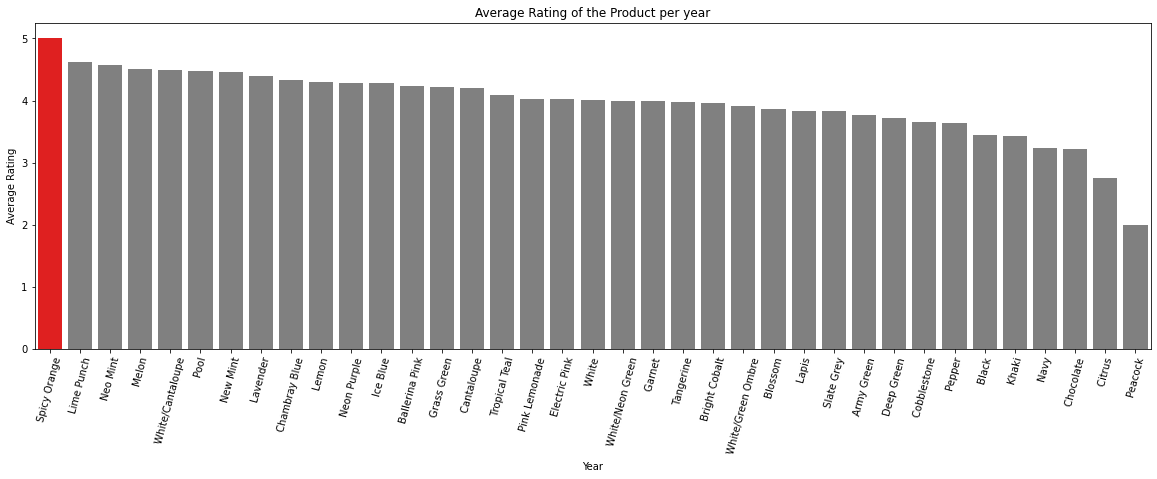

In [9]:
plt.figure(figsize=(20,6))
colours = ['grey' if (x < max(color_wise_ratings)) else 'red' for x in color_wise_ratings]
sns.barplot(color_wise_ratings.index, color_wise_ratings, palette=colours)
plt.xticks(rotation=75)
plt.title('Average Rating of the Product per year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

Here, We can see the ratings of all the colors in the descending order with highest rated product in red colour.

### Answer 4: From the above graph, we can see that the Spicy Orange Color has got the highest rating where Peacock color has got the lowest rating.